2024-12-02 15:13:11.883093: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-02 15:13:11.918065: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-02 15:13:12.512697: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Training, validation, and test datasets are ready.


2024-12-02 15:13:13.855630: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-02 15:13:13.903652: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-02 15:13:13.903804: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

CNN model has been created, you can proceed to train your data with this model.
Epoch 1/500


2024-12-02 15:13:16.470239: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8905
2024-12-02 15:13:17.251224: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-12-02 15:13:17.257198: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x332a2a70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-12-02 15:13:17.257223: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Laptop GPU, Compute Capability 8.6
2024-12-02 15:13:17.260650: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-12-02 15:13:17.340338: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime o

180/180 [==============================] - 57s 304ms/step - loss: 2.4409 - accuracy: 0.2069 - val_loss: 1.8145 - val_accuracy: 0.2571
Epoch 2/500
180/180 [==============================] - 43s 239ms/step - loss: 2.1802 - accuracy: 0.2429 - val_loss: 1.7680 - val_accuracy: 0.2954
Epoch 3/500
180/180 [==============================] - 37s 207ms/step - loss: 2.0888 - accuracy: 0.2595 - val_loss: 1.7465 - val_accuracy: 0.3113
Epoch 4/500
180/180 [==============================] - 40s 223ms/step - loss: 2.0148 - accuracy: 0.2686 - val_loss: 1.7279 - val_accuracy: 0.3168
Epoch 5/500
180/180 [==============================] - 38s 213ms/step - loss: 1.9697 - accuracy: 0.2743 - val_loss: 1.7095 - val_accuracy: 0.3310
Epoch 6/500
180/180 [==============================] - 77s 430ms/step - loss: 1.9264 - accuracy: 0.2830 - val_loss: 1.7021 - val_accuracy: 0.3353
Epoch 7/500
180/180 [==============================] - 81s 450ms/step - loss: 1.8944 - accuracy: 0.2912 - val_loss: 1.6945 - val_accurac

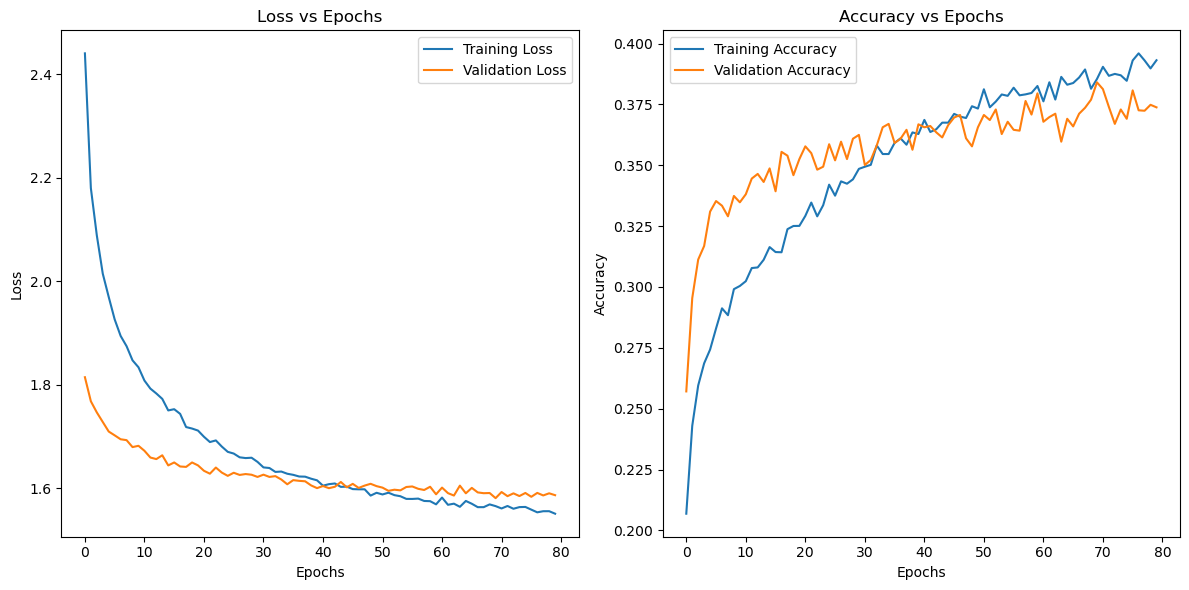

In [1]:
#EXP2#FERVGG19

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense, Flatten, BatchNormalization, 
                                     Dropout, Conv2D, MaxPooling2D)
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import os


# Folder path for training images
folder_path = "images/train"  

# Image specifications
picture_size = 48  # Define picture size
batch_size = 128




# Data Generators for training and validation sets
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Automatically split 20% for validation
)

# Training set
train_set = datagen.flow_from_directory(
    "images/train",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    subset='training'  # Use the training subset
)

# Validation set
val_set = datagen.flow_from_directory(
    "images/train",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    subset='validation'  # Use the validation subset
)

# Test set
datagen_test = ImageDataGenerator(rescale=1./255)
test_set = datagen_test.flow_from_directory(
    "images/test",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=False
)

print("Training, validation, and test datasets are ready.")



# Load the pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Show the model summary
#base_model.summary()

# Create a Sequential model
model = Sequential()

# Add base model
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
model.add(Dense(7, activation='softmax'))

# Set base model to not trainable
base_model.trainable = False

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
print('CNN model has been created, you can proceed to train your data with this model.')



early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model

history = model.fit(
    train_set,
    epochs=500,
    validation_data=val_set,
    callbacks=[early_stopping]
)


# Evaluate the model on the validation dataset (since you don't have a separate test dataset)

val_loss, val_accuracy = model.evaluate(val_set)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

print('Your model has been trained!')

# Plotting training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Training, validation, and test datasets are ready.
CNN model has been created, you can proceed to train your data with this model.
Epoch 1/500
180/180 [==============================] - 15s 74ms/step - loss: 2.4471 - accuracy: 0.1988 - val_loss: 1.8467 - val_accuracy: 0.2674
Epoch 2/500
180/180 [==============================] - 13s 74ms/step - loss: 2.1875 - accuracy: 0.2392 - val_loss: 1.7878 - val_accuracy: 0.2984
Epoch 3/500
180/180 [==============================] - 13s 74ms/step - loss: 2.0872 - accuracy: 0.2571 - val_loss: 1.7697 - val_accuracy: 0.3104
Epoch 4/500
180/180 [==============================] - 13s 74ms/step - loss: 2.0200 - accuracy: 0.2675 - val_loss: 1.7415 - val_accuracy: 0.3172
Epoch 5/500
180/180 [==============================] - 13s 74ms/step - loss: 1.9778 - accuracy: 0.2708 - val_loss: 1.7160 - val_accuracy: 0.3271
Epoch 6/500
180/1

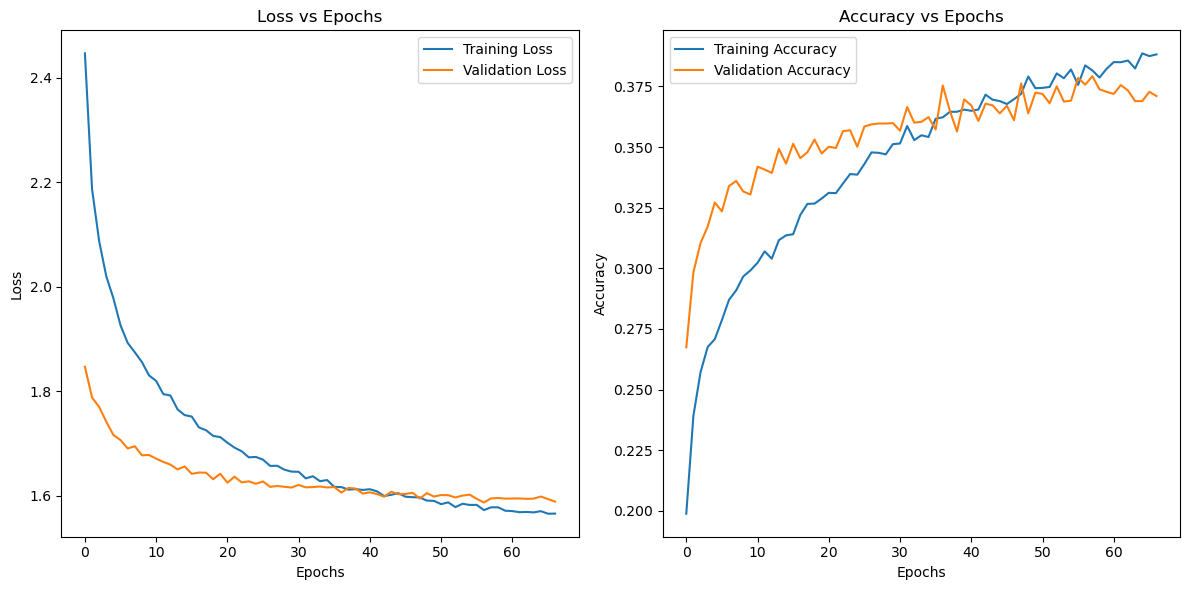

In [2]:
#EXP3#FERVGG19

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense, Flatten, BatchNormalization, 
                                     Dropout, Conv2D, MaxPooling2D)
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import os


# Folder path for training images
folder_path = "images/train"  

# Image specifications
picture_size = 48  # Define picture size
batch_size = 128




# Data Generators for training and validation sets
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Automatically split 20% for validation
)

# Training set
train_set = datagen.flow_from_directory(
    "images/train",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    subset='training'  # Use the training subset
)

# Validation set
val_set = datagen.flow_from_directory(
    "images/train",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    subset='validation'  # Use the validation subset
)

# Test set
datagen_test = ImageDataGenerator(rescale=1./255)
test_set = datagen_test.flow_from_directory(
    "images/test",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=False
)

print("Training, validation, and test datasets are ready.")



# Load the pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Show the model summary
#base_model.summary()

# Create a Sequential model
model = Sequential()

# Add base model
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
model.add(Dense(7, activation='softmax'))

# Set base model to not trainable
base_model.trainable = False

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
print('CNN model has been created, you can proceed to train your data with this model.')



early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model

history = model.fit(
    train_set,
    epochs=500,
    validation_data=val_set,
    callbacks=[early_stopping]
)


# Evaluate the model on the validation dataset (since you don't have a separate test dataset)

val_loss, val_accuracy = model.evaluate(val_set)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

print('Your model has been trained!')

# Plotting training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


2024-12-03 02:30:11.770718: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-03 02:30:12.105995: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-03 02:30:12.892575: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Training, validation, and test datasets are ready.


2024-12-03 02:30:14.663631: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-03 02:30:14.841198: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-03 02:30:14.841346: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

CNN model has been created, you can proceed to train your data with this model.
Epoch 1/500


2024-12-03 02:30:18.181928: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8905
2024-12-03 02:30:19.099647: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-12-03 02:30:19.118423: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7ed6836c5ec0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-12-03 02:30:19.118436: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Laptop GPU, Compute Capability 8.6
2024-12-03 02:30:19.133410: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-12-03 02:30:19.267161: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifeti

180/180 [==============================] - 52s 269ms/step - loss: 2.4496 - accuracy: 0.2008 - val_loss: 1.8001 - val_accuracy: 0.3010
Epoch 2/500
180/180 [==============================] - 35s 193ms/step - loss: 2.2074 - accuracy: 0.2334 - val_loss: 1.7824 - val_accuracy: 0.3104
Epoch 3/500
180/180 [==============================] - 27s 147ms/step - loss: 2.1095 - accuracy: 0.2549 - val_loss: 1.7539 - val_accuracy: 0.3228
Epoch 4/500
180/180 [==============================] - 36s 199ms/step - loss: 2.0294 - accuracy: 0.2650 - val_loss: 1.7405 - val_accuracy: 0.3264
Epoch 5/500
180/180 [==============================] - 36s 202ms/step - loss: 1.9808 - accuracy: 0.2736 - val_loss: 1.7212 - val_accuracy: 0.3264
Epoch 6/500
180/180 [==============================] - 31s 174ms/step - loss: 1.9430 - accuracy: 0.2772 - val_loss: 1.7044 - val_accuracy: 0.3344
Epoch 7/500
180/180 [==============================] - 36s 201ms/step - loss: 1.9006 - accuracy: 0.2872 - val_loss: 1.7003 - val_accurac

Epoch 57/500
180/180 [==============================] - 48s 268ms/step - loss: 1.5777 - accuracy: 0.3811 - val_loss: 1.5927 - val_accuracy: 0.3726
Epoch 58/500
180/180 [==============================] - 49s 273ms/step - loss: 1.5755 - accuracy: 0.3847 - val_loss: 1.5869 - val_accuracy: 0.3668
Epoch 59/500
180/180 [==============================] - 51s 281ms/step - loss: 1.5773 - accuracy: 0.3779 - val_loss: 1.6003 - val_accuracy: 0.3670
Epoch 60/500
180/180 [==============================] - 52s 289ms/step - loss: 1.5790 - accuracy: 0.3782 - val_loss: 1.5965 - val_accuracy: 0.3670
Epoch 61/500
180/180 [==============================] - 53s 296ms/step - loss: 1.5765 - accuracy: 0.3798 - val_loss: 1.5975 - val_accuracy: 0.3656
Epoch 62/500
180/180 [==============================] - 53s 296ms/step - loss: 1.5745 - accuracy: 0.3800 - val_loss: 1.5931 - val_accuracy: 0.3698
Epoch 63/500
180/180 [==============================] - 57s 315ms/step - loss: 1.5691 - accuracy: 0.3838 - val_loss: 1

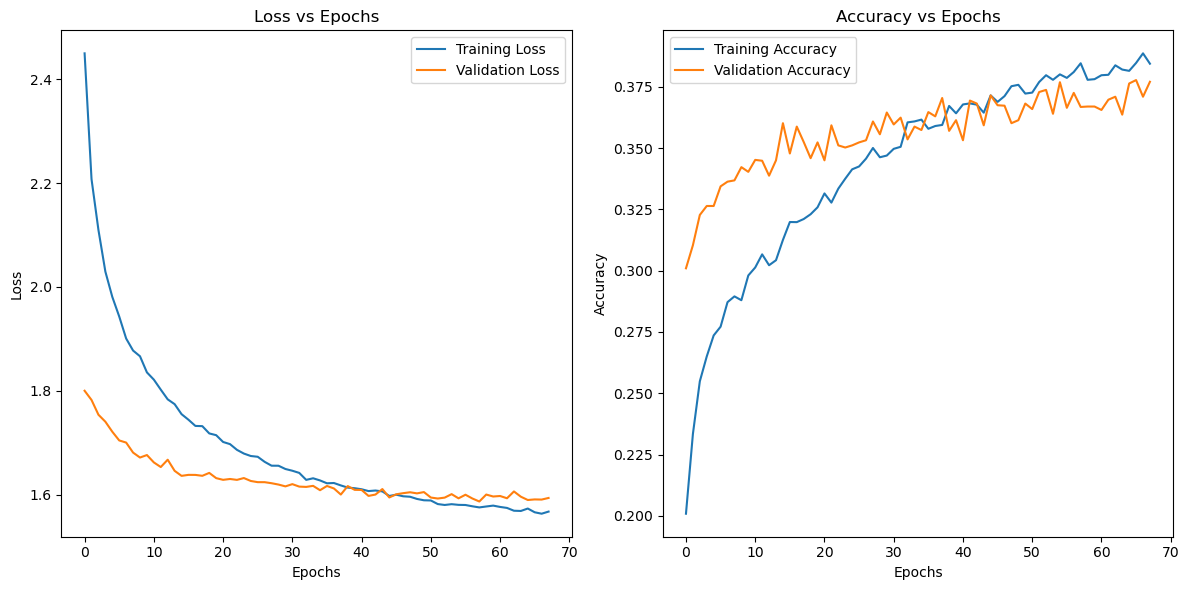

In [1]:
#EXP4#FERVGG19

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense, Flatten, BatchNormalization, 
                                     Dropout, Conv2D, MaxPooling2D)
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import os


# Folder path for training images
folder_path = "images/train"  

# Image specifications
picture_size = 48  # Define picture size
batch_size = 128




# Data Generators for training and validation sets
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Automatically split 20% for validation
)

# Training set
train_set = datagen.flow_from_directory(
    "images/train",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    subset='training'  # Use the training subset
)

# Validation set
val_set = datagen.flow_from_directory(
    "images/train",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    subset='validation'  # Use the validation subset
)

# Test set
datagen_test = ImageDataGenerator(rescale=1./255)
test_set = datagen_test.flow_from_directory(
    "images/test",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=False
)

print("Training, validation, and test datasets are ready.")



# Load the pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Show the model summary
#base_model.summary()

# Create a Sequential model
model = Sequential()

# Add base model
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
model.add(Dense(7, activation='softmax'))

# Set base model to not trainable
base_model.trainable = False

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
print('CNN model has been created, you can proceed to train your data with this model.')



early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model

history = model.fit(
    train_set,
    epochs=500,
    validation_data=val_set,
    callbacks=[early_stopping]
)


# Evaluate the model on the validation dataset (since you don't have a separate test dataset)

val_loss, val_accuracy = model.evaluate(val_set)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

print('Your model has been trained!')

# Plotting training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


2024-12-03 04:25:57.146493: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-03 04:25:57.463982: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-03 04:25:58.261520: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Training, validation, and test datasets are ready.


2024-12-03 04:26:00.037936: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-03 04:26:00.216751: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-03 04:26:00.216933: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

CNN model has been created, you can proceed to train your data with this model.
Epoch 1/500


2024-12-03 04:26:03.303826: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8905
2024-12-03 04:26:04.014896: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-12-03 04:26:04.034514: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x32bb0120 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-12-03 04:26:04.034535: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Laptop GPU, Compute Capability 8.6
2024-12-03 04:26:04.050211: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-12-03 04:26:04.196571: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime o

180/180 [==============================] - 19s 88ms/step - loss: 2.4573 - accuracy: 0.1970 - val_loss: 1.8333 - val_accuracy: 0.2339
Epoch 2/500
180/180 [==============================] - 14s 75ms/step - loss: 2.2116 - accuracy: 0.2316 - val_loss: 1.7563 - val_accuracy: 0.2994
Epoch 3/500
180/180 [==============================] - 15s 85ms/step - loss: 2.1012 - accuracy: 0.2507 - val_loss: 1.7504 - val_accuracy: 0.3135
Epoch 4/500
180/180 [==============================] - 14s 78ms/step - loss: 2.0311 - accuracy: 0.2648 - val_loss: 1.7306 - val_accuracy: 0.3249
Epoch 5/500
180/180 [==============================] - 14s 80ms/step - loss: 1.9751 - accuracy: 0.2750 - val_loss: 1.7316 - val_accuracy: 0.3261
Epoch 6/500
180/180 [==============================] - 14s 77ms/step - loss: 1.9444 - accuracy: 0.2788 - val_loss: 1.7137 - val_accuracy: 0.3229
Epoch 7/500
180/180 [==============================] - 16s 87ms/step - loss: 1.9096 - accuracy: 0.2839 - val_loss: 1.7044 - val_accuracy: 0.32

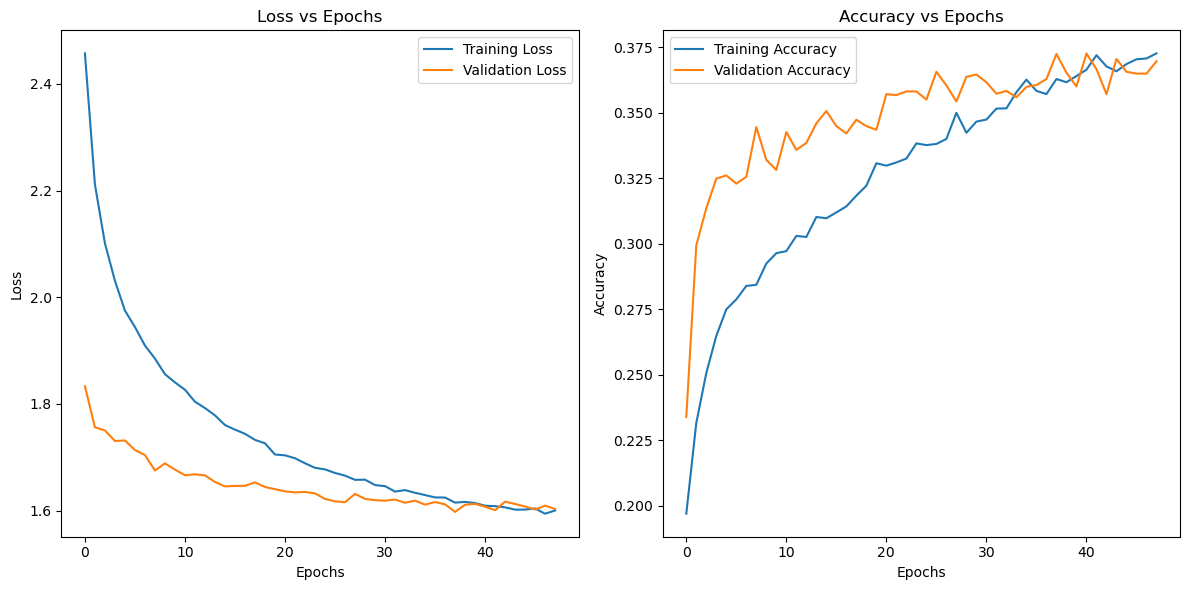

In [1]:
#EXP4#FERVGG19

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense, Flatten, BatchNormalization, 
                                     Dropout, Conv2D, MaxPooling2D)
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import os


# Folder path for training images
folder_path = "images/train"  

# Image specifications
picture_size = 48  # Define picture size
batch_size = 128




# Data Generators for training and validation sets
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Automatically split 20% for validation
)

# Training set
train_set = datagen.flow_from_directory(
    "images/train",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    subset='training'  # Use the training subset
)

# Validation set
val_set = datagen.flow_from_directory(
    "images/train",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    subset='validation'  # Use the validation subset
)

# Test set
datagen_test = ImageDataGenerator(rescale=1./255)
test_set = datagen_test.flow_from_directory(
    "images/test",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=False
)

print("Training, validation, and test datasets are ready.")



# Load the pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Show the model summary
#base_model.summary()

# Create a Sequential model
model = Sequential()

# Add base model
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
model.add(Dense(7, activation='softmax'))

# Set base model to not trainable
base_model.trainable = False

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
print('CNN model has been created, you can proceed to train your data with this model.')



early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model

history = model.fit(
    train_set,
    epochs=500,
    validation_data=val_set,
    callbacks=[early_stopping]
)


# Evaluate the model on the validation dataset (since you don't have a separate test dataset)

val_loss, val_accuracy = model.evaluate(val_set)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

print('Your model has been trained!')

# Plotting training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Training, validation, and test datasets are ready.
CNN model has been created, you can proceed to train your data with this model.
Epoch 1/500
180/180 [==============================] - 16s 79ms/step - loss: 2.4617 - accuracy: 0.2038 - val_loss: 1.8280 - val_accuracy: 0.2900
Epoch 2/500
180/180 [==============================] - 14s 79ms/step - loss: 2.2113 - accuracy: 0.2393 - val_loss: 1.7849 - val_accuracy: 0.3102
Epoch 3/500
180/180 [==============================] - 15s 83ms/step - loss: 2.1127 - accuracy: 0.2510 - val_loss: 1.7562 - val_accuracy: 0.3165
Epoch 4/500
180/180 [==============================] - 15s 83ms/step - loss: 2.0319 - accuracy: 0.2632 - val_loss: 1.7382 - val_accuracy: 0.3296
Epoch 5/500
180/180 [==============================] - 15s 81ms/step - loss: 1.9793 - accuracy: 0.2716 - val_loss: 1.7498 - val_accuracy: 0.3205
Epoch 6/500
180/1

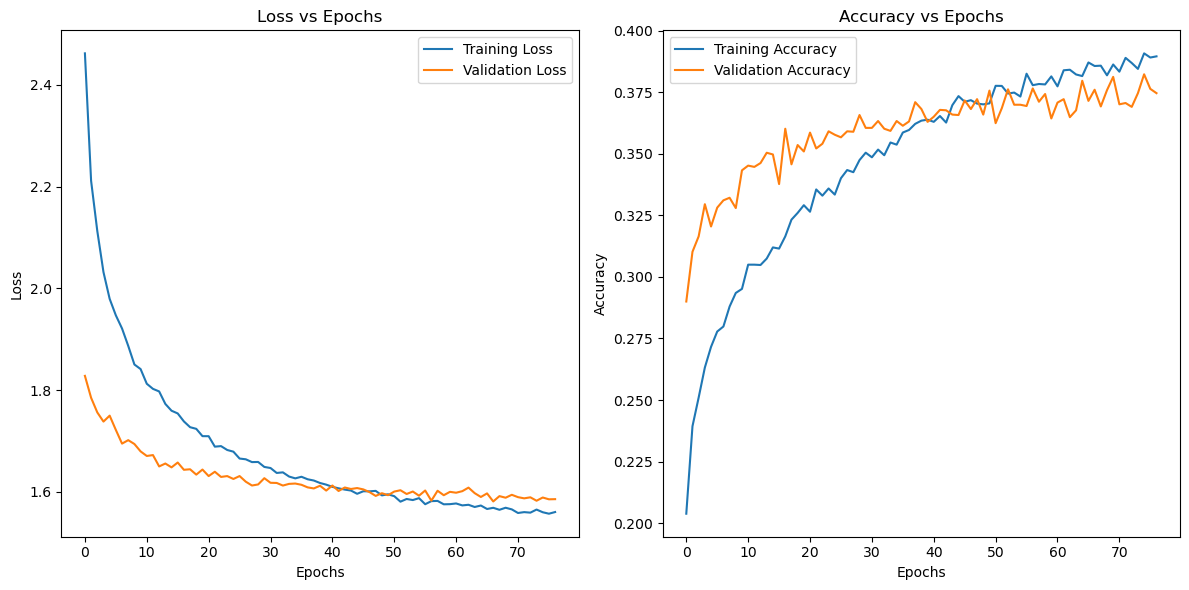

In [2]:
#EXP1#FERresnet19

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense, Flatten, BatchNormalization, 
                                     Dropout, Conv2D, MaxPooling2D)
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import os


# Folder path for training images
folder_path = "images/train"  

# Image specifications
picture_size = 48  # Define picture size
batch_size = 128




# Data Generators for training and validation sets
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Automatically split 20% for validation
)

# Training set
train_set = datagen.flow_from_directory(
    "images/train",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    subset='training'  # Use the training subset
)

# Validation set
val_set = datagen.flow_from_directory(
    "images/train",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    subset='validation'  # Use the validation subset
)

# Test set
datagen_test = ImageDataGenerator(rescale=1./255)
test_set = datagen_test.flow_from_directory(
    "images/test",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=False
)

print("Training, validation, and test datasets are ready.")



#model resnet152

from keras.applications.resnet import ResNet152
conv_base = ResNet152(
    weights='imagenet',
    include_top = False,
    input_shape=(48,48,3)
)


# Show the model summary
#base_model.summary()

# Create a Sequential model
model = Sequential()

# Add base model
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
model.add(Dense(7, activation='softmax'))

# Set base model to not trainable
base_model.trainable = False

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
print('CNN model has been created, you can proceed to train your data with this model.')



early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model

history = model.fit(
    train_set,
    epochs=500,
    validation_data=val_set,
    callbacks=[early_stopping]
)


# Evaluate the model on the validation dataset (since you don't have a separate test dataset)

val_loss, val_accuracy = model.evaluate(val_set)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

print('Your model has been trained!')

# Plotting training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [3]:
#exp2resenrfer

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Training, validation, and test datasets are ready.
CNN model has been created, you can proceed to train your data with this model.
Epoch 1/500
180/180 [==============================] - 15s 74ms/step - loss: 2.4444 - accuracy: 0.1953 - val_loss: 1.8954 - val_accuracy: 0.2008
Epoch 2/500
180/180 [==============================] - 13s 74ms/step - loss: 2.1899 - accuracy: 0.2415 - val_loss: 1.7971 - val_accuracy: 0.3005
Epoch 3/500
180/180 [==============================] - 13s 74ms/step - loss: 2.0776 - accuracy: 0.2598 - val_loss: 1.7593 - val_accuracy: 0.3135
Epoch 4/500
180/180 [==============================] - 13s 73ms/step - loss: 2.0225 - accuracy: 0.2660 - val_loss: 1.7323 - val_accuracy: 0.3224
Epoch 5/500
180/180 [==============================] - 13s 74ms/step - loss: 1.9776 - accuracy: 0.2706 - val_loss: 1.7171 - val_accuracy: 0.3285
Epoch 6/500
180/1

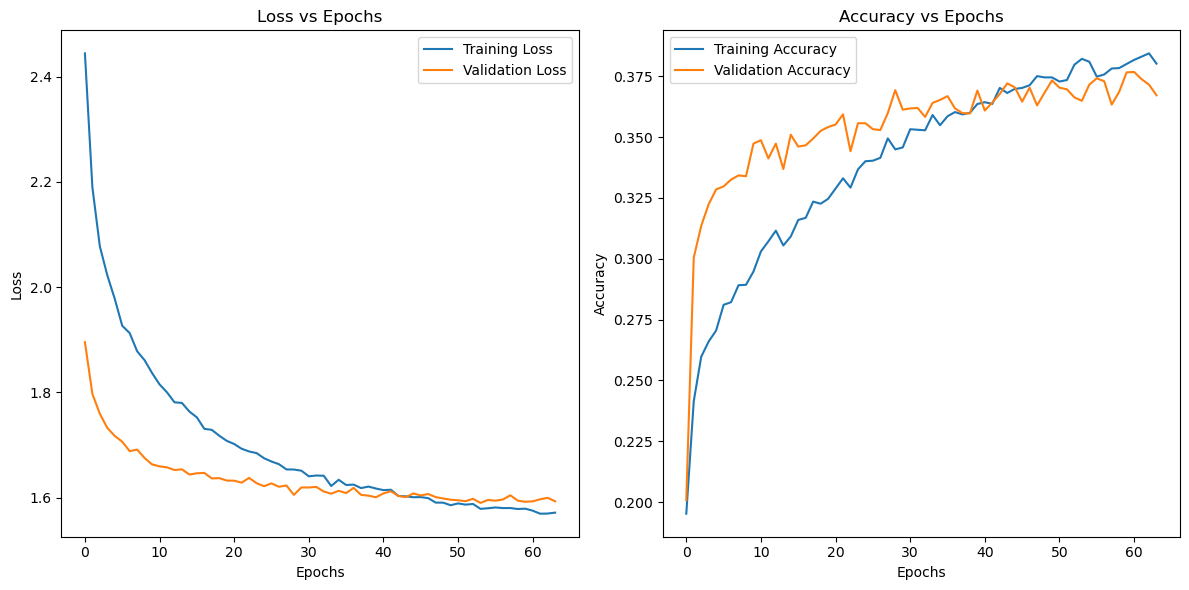

In [4]:
#EXP2#FERresnet

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense, Flatten, BatchNormalization, 
                                     Dropout, Conv2D, MaxPooling2D)
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import os


# Folder path for training images
folder_path = "images/train"  

# Image specifications
picture_size = 48  # Define picture size
batch_size = 128




# Data Generators for training and validation sets
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Automatically split 20% for validation
)

# Training set
train_set = datagen.flow_from_directory(
    "images/train",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    subset='training'  # Use the training subset
)

# Validation set
val_set = datagen.flow_from_directory(
    "images/train",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    subset='validation'  # Use the validation subset
)

# Test set
datagen_test = ImageDataGenerator(rescale=1./255)
test_set = datagen_test.flow_from_directory(
    "images/test",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=False
)

print("Training, validation, and test datasets are ready.")



#model resnet152

from keras.applications.resnet import ResNet152
conv_base = ResNet152(
    weights='imagenet',
    include_top = False,
    input_shape=(48,48,3)
)


# Show the model summary
#base_model.summary()

# Create a Sequential model
model = Sequential()

# Add base model
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
model.add(Dense(7, activation='softmax'))

# Set base model to not trainable
base_model.trainable = False

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
print('CNN model has been created, you can proceed to train your data with this model.')



early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model

history = model.fit(
    train_set,
    epochs=500,
    validation_data=val_set,
    callbacks=[early_stopping]
)


# Evaluate the model on the validation dataset (since you don't have a separate test dataset)

val_loss, val_accuracy = model.evaluate(val_set)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

print('Your model has been trained!')

# Plotting training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
validation_data=val_set

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Training, validation, and test datasets are ready.
CNN model has been created, you can proceed to train your data with this model.
Epoch 1/500
180/180 [==============================] - 15s 74ms/step - loss: 2.4451 - accuracy: 0.2001 - val_loss: 1.7890 - val_accuracy: 0.2925
Epoch 2/500
180/180 [==============================] - 13s 73ms/step - loss: 2.1668 - accuracy: 0.2437 - val_loss: 1.7579 - val_accuracy: 0.3130
Epoch 3/500
180/180 [==============================] - 13s 73ms/step - loss: 2.0720 - accuracy: 0.2573 - val_loss: 1.7337 - val_accuracy: 0.3186
Epoch 4/500
180/180 [==============================] - 13s 74ms/step - loss: 2.0018 - accuracy: 0.2685 - val_loss: 1.7448 - val_accuracy: 0.3224
Epoch 5/500
180/180 [==============================] - 13s 73ms/step - loss: 1.9548 - accuracy: 0.2774 - val_loss: 1.7115 - val_accuracy: 0.3287
Epoch 6/500
180/1

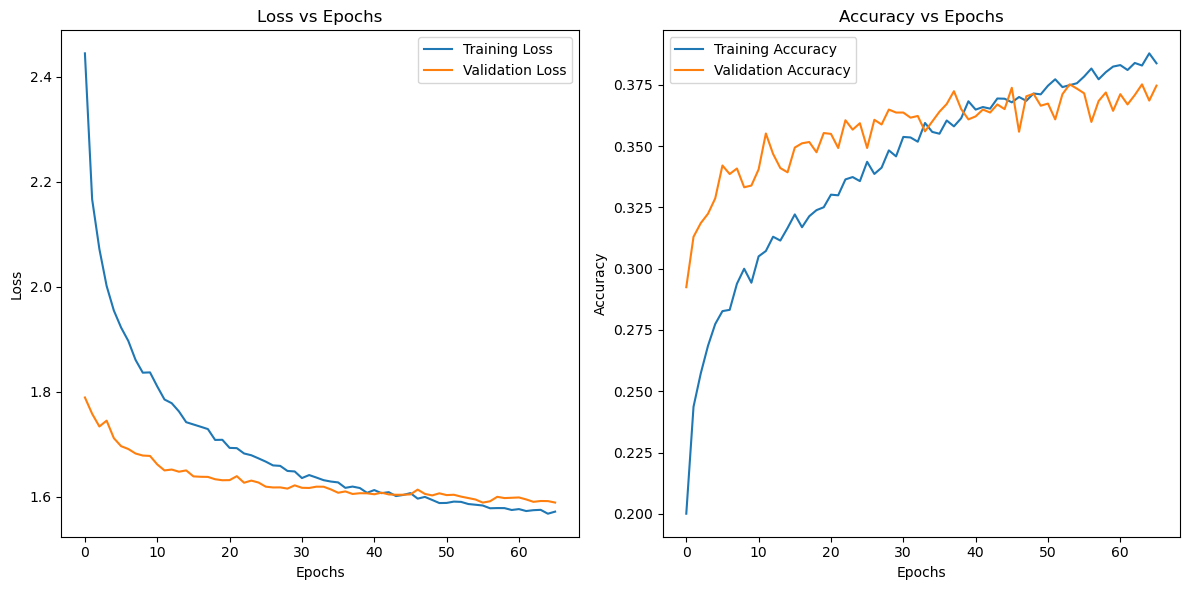

In [5]:
#EXP3validation_data=val_setvalidation_data=val_setvalidation_data=val_set#FERresnet

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense, Flatten, BatchNormalization, 
                                     Dropout, Conv2D, MaxPooling2D)
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import os


# Folder path for training images
folder_path = "images/train"  

# Image specifications
picture_size = 48  # Define picture size
batch_size = 128




# Data Generators for training and validation sets
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Automatically split 20% for validation
)

# Training set
train_set = datagen.flow_from_directory(
    "images/train",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    subset='training'  # Use the training subset
)

# Validation set
val_set = datagen.flow_from_directory(
    "images/train",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    subset='validation'  # Use the validation subset
)

# Test set
datagen_test = ImageDataGenerator(rescale=1./255)
test_set = datagen_test.flow_from_directory(
    "images/test",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=False
)

print("Training, validation, and test datasets are ready.")



#model resnet152

from keras.applications.resnet import ResNet152
conv_base = ResNet152(
    weights='imagenet',
    include_top = False,
    input_shape=(48,48,3)
)


# Show the model summary
#base_model.summary()

# Create a Sequential model
model = Sequential()

# Add base model
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
model.add(Dense(7, activation='softmax'))

# Set base model to not trainable
base_model.trainable = False

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
print('CNN model has been created, you can proceed to train your data with this model.')



early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model

history = model.fit(
    train_set,
    epochs=500,
    validation_data=val_set,
    callbacks=[early_stopping]
)


# Evaluate the model on the validation dataset (since you don't have a separate test dataset)

val_loss, val_accuracy = model.evaluate(val_set)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

print('Your model has been trained!')

# Plotting training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
validation_data=val_set

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Training, validation, and test datasets are ready.
CNN model has been created, you can proceed to train your data with this model.
Epoch 1/500
180/180 [==============================] - 15s 74ms/step - loss: 2.4669 - accuracy: 0.1986 - val_loss: 1.8507 - val_accuracy: 0.2695
Epoch 2/500
180/180 [==============================] - 13s 72ms/step - loss: 2.2130 - accuracy: 0.2348 - val_loss: 1.7804 - val_accuracy: 0.3078
Epoch 3/500
180/180 [==============================] - 13s 73ms/step - loss: 2.0944 - accuracy: 0.2594 - val_loss: 1.7639 - val_accuracy: 0.3121
Epoch 4/500
180/180 [==============================] - 13s 73ms/step - loss: 2.0364 - accuracy: 0.2640 - val_loss: 1.7483 - val_accuracy: 0.3215
Epoch 5/500
180/180 [==============================] - 13s 73ms/step - loss: 1.9816 - accuracy: 0.2727 - val_loss: 1.7320 - val_accuracy: 0.3273
Epoch 6/500
180/1

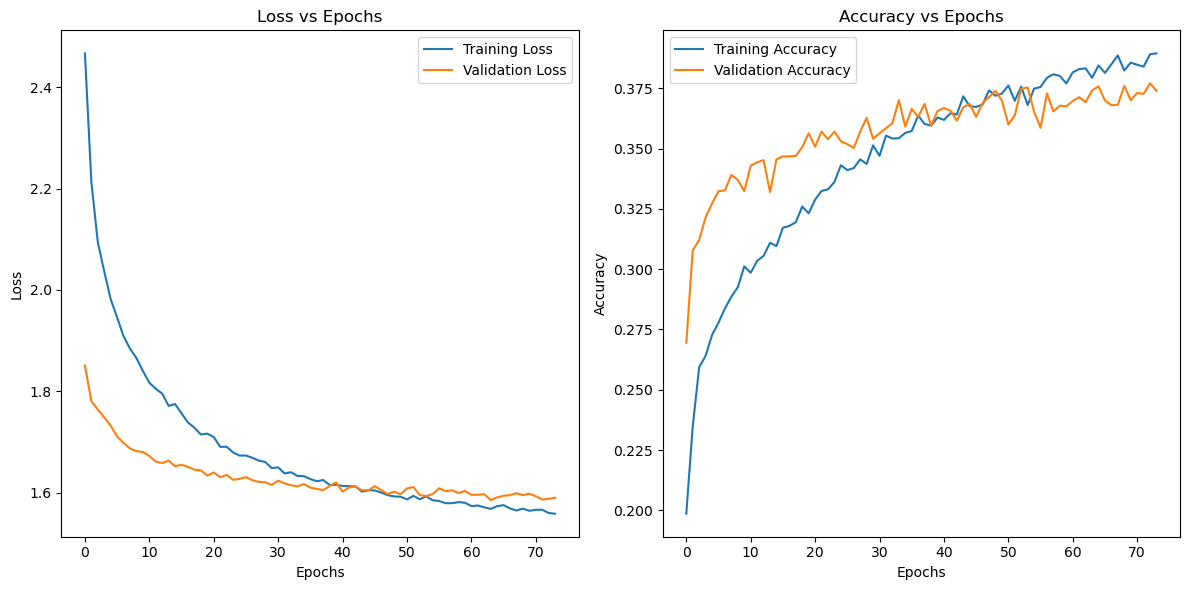

In [6]:
#EXP4validation_data=val_set#FERresnet

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense, Flatten, BatchNormalization, 
                                     Dropout, Conv2D, MaxPooling2D)
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import os


# Folder path for training images
folder_path = "images/train"  

# Image specifications
picture_size = 48  # Define picture size
batch_size = 128




# Data Generators for training and validation sets
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Automatically split 20% for validation
)

# Training set
train_set = datagen.flow_from_directory(
    "images/train",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    subset='training'  # Use the training subset
)

# Validation set
val_set = datagen.flow_from_directory(
    "images/train",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    subset='validation'  # Use the validation subset
)

# Test set
datagen_test = ImageDataGenerator(rescale=1./255)
test_set = datagen_test.flow_from_directory(
    "images/test",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=False
)

print("Training, validation, and test datasets are ready.")



#model resnet152

from keras.applications.resnet import ResNet152
conv_base = ResNet152(
    weights='imagenet',
    include_top = False,
    input_shape=(48,48,3)
)


# Show the model summary
#base_model.summary()

# Create a Sequential model
model = Sequential()

# Add base model
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
model.add(Dense(7, activation='softmax'))

# Set base model to not trainable
base_model.trainable = False

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
print('CNN model has been created, you can proceed to train your data with this model.')



early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model

history = model.fit(
    train_set,
    epochs=500,
    validation_data=val_set,
    callbacks=[early_stopping]
)


# Evaluate the model on the validation dataset (since you don't have a separate test dataset)

val_loss, val_accuracy = model.evaluate(val_set)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

print('Your model has been trained!')

# Plotting training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
validation_data=val_set

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Training, validation, and test datasets are ready.
CNN model has been created, you can proceed to train your data with this model.
Epoch 1/500
180/180 [==============================] - 15s 75ms/step - loss: 2.4631 - accuracy: 0.2004 - val_loss: 1.8747 - val_accuracy: 0.2608
Epoch 2/500
180/180 [==============================] - 13s 73ms/step - loss: 2.2055 - accuracy: 0.2357 - val_loss: 1.7964 - val_accuracy: 0.2980
Epoch 3/500
180/180 [==============================] - 13s 74ms/step - loss: 2.0927 - accuracy: 0.2567 - val_loss: 1.7512 - val_accuracy: 0.3196
Epoch 4/500
180/180 [==============================] - 13s 74ms/step - loss: 2.0248 - accuracy: 0.2652 - val_loss: 1.7388 - val_accuracy: 0.3247
Epoch 5/500
180/180 [==============================] - 13s 74ms/step - loss: 1.9827 - accuracy: 0.2729 - val_loss: 1.7251 - val_accuracy: 0.3303
Epoch 6/500
180/1

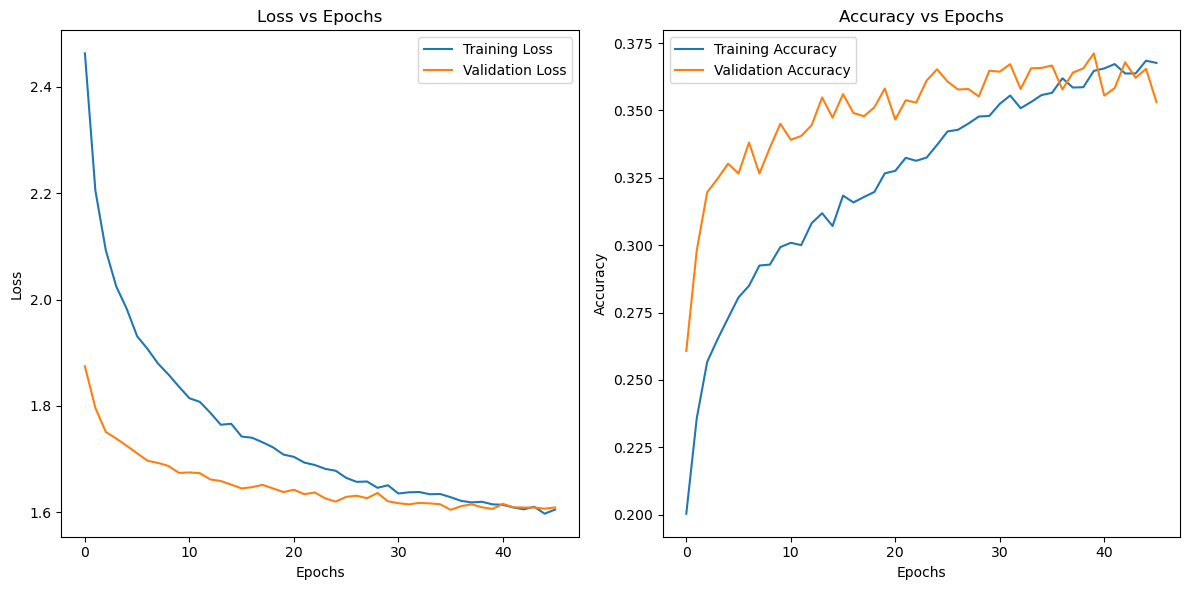

In [7]:
#EXP5#FERresnet

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense, Flatten, BatchNormalization, 
                                     Dropout, Conv2D, MaxPooling2D)
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import os


# Folder path for training images
folder_path = "images/train"  

# Image specifications
picture_size = 48  # Define picture size
batch_size = 128




# Data Generators for training and validation sets
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Automatically split 20% for validation
)

# Training set
train_set = datagen.flow_from_directory(
    "images/train",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    subset='training'  # Use the training subset
)

# Validation set
val_set = datagen.flow_from_directory(
    "images/train",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    subset='validation'  # Use the validation subset
)

# Test set
datagen_test = ImageDataGenerator(rescale=1./255)
test_set = datagen_test.flow_from_directory(
    "images/test",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=False
)

print("Training, validation, and test datasets are ready.")



#model resnet152

from keras.applications.resnet import ResNet152
conv_base = ResNet152(
    weights='imagenet',
    include_top = False,
    input_shape=(48,48,3)
)


# Show the model summary
#base_model.summary()

# Create a Sequential model
model = Sequential()

# Add base model
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
model.add(Dense(7, activation='softmax'))

# Set base model to not trainable
base_model.trainable = False

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
print('CNN model has been created, you can proceed to train your data with this model.')



early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model

history = model.fit(
    train_set,
    epochs=500,
    validation_data=val_set,
    callbacks=[early_stopping]
)


# Evaluate the model on the validation dataset (since you don't have a separate test dataset)

val_loss, val_accuracy = model.evaluate(val_set)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

print('Your model has been trained!')

# Plotting training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
validation_data=val_set

In [8]:
#fer6resnet

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Training, validation, and test datasets are ready.
CNN model has been created, you can proceed to train your data with this model.
Epoch 1/500
180/180 [==============================] - 14s 74ms/step - loss: 2.4376 - accuracy: 0.2042 - val_loss: 1.8325 - val_accuracy: 0.2886
Epoch 2/500
180/180 [==============================] - 13s 73ms/step - loss: 2.2010 - accuracy: 0.2369 - val_loss: 1.7695 - val_accuracy: 0.3116
Epoch 3/500
180/180 [==============================] - 13s 73ms/step - loss: 2.0941 - accuracy: 0.2549 - val_loss: 1.7599 - val_accuracy: 0.3135
Epoch 4/500
180/180 [==============================] - 13s 73ms/step - loss: 2.0152 - accuracy: 0.2666 - val_loss: 1.7417 - val_accuracy: 0.3301
Epoch 5/500
180/180 [==============================] - 13s 74ms/step - loss: 1.9766 - accuracy: 0.2745 - val_loss: 1.7095 - val_accuracy: 0.3278
Epoch 6/500
180/1

Epoch 111/500
180/180 [==============================] - 13s 73ms/step - loss: 1.5284 - accuracy: 0.4032 - val_loss: 1.5764 - val_accuracy: 0.3797
Epoch 112/500
180/180 [==============================] - 13s 74ms/step - loss: 1.5233 - accuracy: 0.4029 - val_loss: 1.5885 - val_accuracy: 0.3780
Epoch 113/500
180/180 [==============================] - 13s 73ms/step - loss: 1.5255 - accuracy: 0.4052 - val_loss: 1.5794 - val_accuracy: 0.3813
Epoch 114/500
180/180 [==============================] - 13s 73ms/step - loss: 1.5228 - accuracy: 0.4053 - val_loss: 1.5856 - val_accuracy: 0.3764
Epoch 115/500
180/180 [==============================] - 13s 73ms/step - loss: 1.5283 - accuracy: 0.4011 - val_loss: 1.5779 - val_accuracy: 0.3802
Epoch 116/500
180/180 [==============================] - 13s 74ms/step - loss: 1.5231 - accuracy: 0.4039 - val_loss: 1.5756 - val_accuracy: 0.3754
Epoch 117/500
180/180 [==============================] - 13s 73ms/step - loss: 1.5235 - accuracy: 0.4058 - val_loss: 1

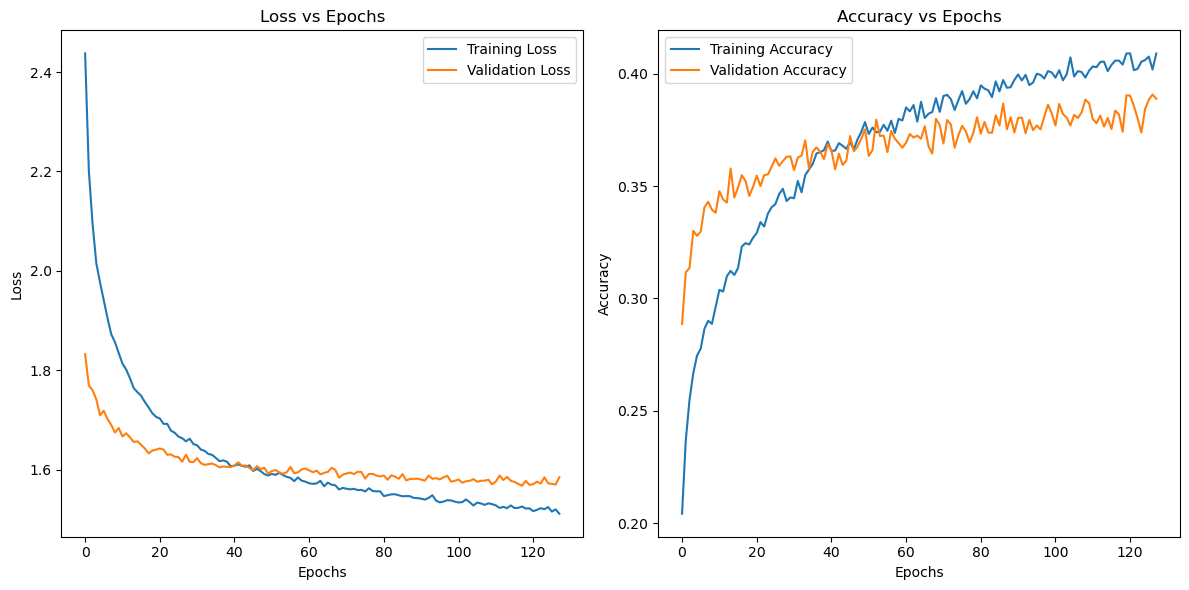

In [9]:
#EXP5#FERresnet

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense, Flatten, BatchNormalization, 
                                     Dropout, Conv2D, MaxPooling2D)
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import os


# Folder path for training images
folder_path = "images/train"  

# Image specifications
picture_size = 48  # Define picture size
batch_size = 128




# Data Generators for training and validation sets
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Automatically split 20% for validation
)

# Training set
train_set = datagen.flow_from_directory(
    "images/train",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    subset='training'  # Use the training subset
)

# Validation set
val_set = datagen.flow_from_directory(
    "images/train",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    subset='validation'  # Use the validation subset
)

# Test set
datagen_test = ImageDataGenerator(rescale=1./255)
test_set = datagen_test.flow_from_directory(
    "images/test",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=False
)

print("Training, validation, and test datasets are ready.")



#model resnet152

from keras.applications.resnet import ResNet152
conv_base = ResNet152(
    weights='imagenet',
    include_top = False,
    input_shape=(48,48,3)
)


# Show the model summary
#base_model.summary()

# Create a Sequential model
model = Sequential()

# Add base model
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
model.add(Dense(7, activation='softmax'))

# Set base model to not trainable
base_model.trainable = False

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
print('CNN model has been created, you can proceed to train your data with this model.')



early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model

history = model.fit(
    train_set,
    epochs=500,
    validation_data=val_set,
    callbacks=[early_stopping]
)


# Evaluate the model on the validation dataset (since you don't have a separate test dataset)

val_loss, val_accuracy = model.evaluate(val_set)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

print('Your model has been trained!')

# Plotting training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
validation_data=val_set

In [10]:
#fer7resnet

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Training, validation, and test datasets are ready.
CNN model has been created, you can proceed to train your data with this model.
Epoch 1/500
180/180 [==============================] - 15s 75ms/step - loss: 2.4904 - accuracy: 0.1915 - val_loss: 1.8383 - val_accuracy: 0.2811
Epoch 2/500
180/180 [==============================] - 13s 73ms/step - loss: 2.2141 - accuracy: 0.2324 - val_loss: 1.7803 - val_accuracy: 0.3109
Epoch 3/500
180/180 [==============================] - 13s 74ms/step - loss: 2.0926 - accuracy: 0.2530 - val_loss: 1.7623 - val_accuracy: 0.3160
Epoch 4/500
180/180 [==============================] - 13s 74ms/step - loss: 2.0288 - accuracy: 0.2634 - val_loss: 1.7499 - val_accuracy: 0.3189
Epoch 5/500
180/180 [==============================] - 13s 74ms/step - loss: 1.9915 - accuracy: 0.2689 - val_loss: 1.7343 - val_accuracy: 0.3224
Epoch 6/500
180/1

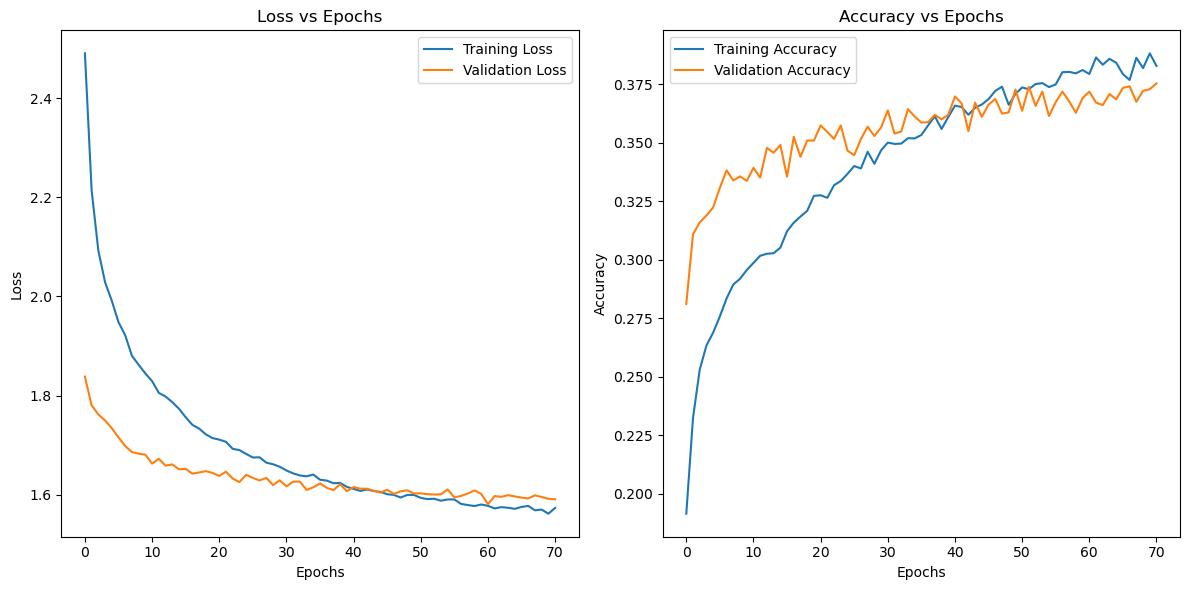

In [11]:
#EXP5#FERresnet

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense, Flatten, BatchNormalization, 
                                     Dropout, Conv2D, MaxPooling2D)
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import os


# Folder path for training images
folder_path = "images/train"  

# Image specifications
picture_size = 48  # Define picture size
batch_size = 128




# Data Generators for training and validation sets
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Automatically split 20% for validation
)

# Training set
train_set = datagen.flow_from_directory(
    "images/train",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    subset='training'  # Use the training subset
)

# Validation set
val_set = datagen.flow_from_directory(
    "images/train",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    subset='validation'  # Use the validation subset
)

# Test set
datagen_test = ImageDataGenerator(rescale=1./255)
test_set = datagen_test.flow_from_directory(
    "images/test",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=False
)

print("Training, validation, and test datasets are ready.")



#model resnet152

from keras.applications.resnet import ResNet152
conv_base = ResNet152(
    weights='imagenet',
    include_top = False,
    input_shape=(48,48,3)
)


# Show the model summary
#base_model.summary()

# Create a Sequential model
model = Sequential()

# Add base model
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
model.add(Dense(7, activation='softmax'))

# Set base model to not trainable
base_model.trainable = False

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
print('CNN model has been created, you can proceed to train your data with this model.')



early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model

history = model.fit(
    train_set,
    epochs=500,
    validation_data=val_set,
    callbacks=[early_stopping]
)


# Evaluate the model on the validation dataset (since you don't have a separate test dataset)

val_loss, val_accuracy = model.evaluate(val_set)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

print('Your model has been trained!')

# Plotting training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
validation_data=val_set

In [12]:
#ferresnet8

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Training, validation, and test datasets are ready.
CNN model has been created, you can proceed to train your data with this model.
Epoch 1/500
180/180 [==============================] - 15s 74ms/step - loss: 2.4390 - accuracy: 0.2103 - val_loss: 1.7886 - val_accuracy: 0.2907
Epoch 2/500
180/180 [==============================] - 13s 73ms/step - loss: 2.2060 - accuracy: 0.2413 - val_loss: 1.7591 - val_accuracy: 0.3101
Epoch 3/500
180/180 [==============================] - 13s 73ms/step - loss: 2.1041 - accuracy: 0.2537 - val_loss: 1.7361 - val_accuracy: 0.3262
Epoch 4/500
180/180 [==============================] - 13s 74ms/step - loss: 2.0343 - accuracy: 0.2639 - val_loss: 1.7384 - val_accuracy: 0.3167
Epoch 5/500
180/180 [==============================] - 13s 74ms/step - loss: 1.9952 - accuracy: 0.2643 - val_loss: 1.7194 - val_accuracy: 0.3254
Epoch 6/500
180/1

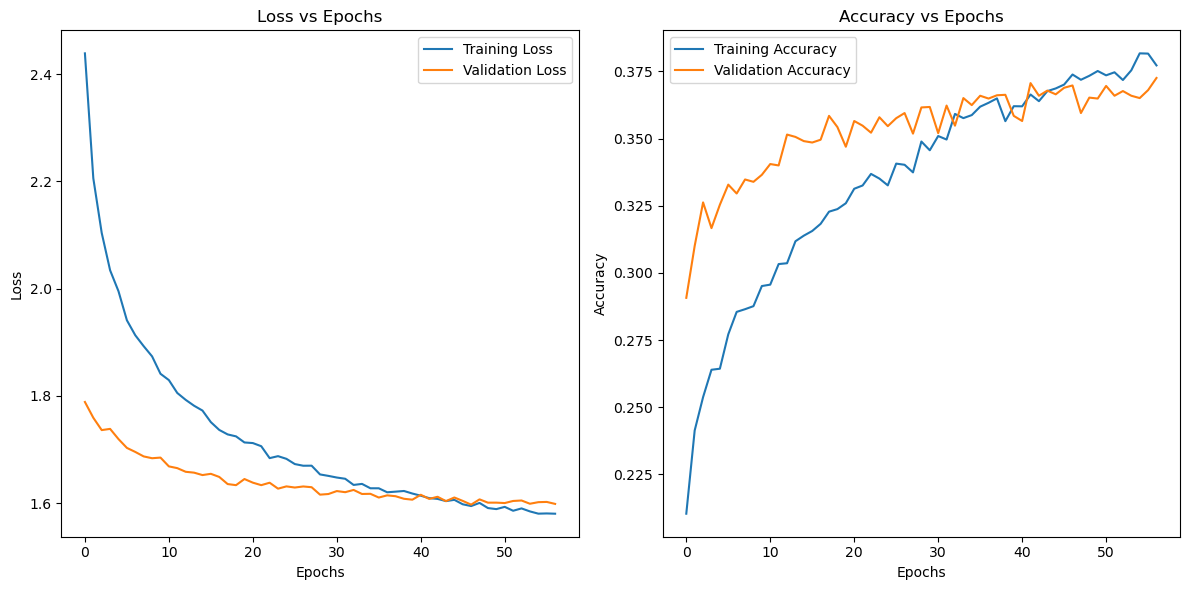

In [13]:
#EXP5#FERresnet

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense, Flatten, BatchNormalization, 
                                     Dropout, Conv2D, MaxPooling2D)
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import os


# Folder path for training images
folder_path = "images/train"  

# Image specifications
picture_size = 48  # Define picture size
batch_size = 128




# Data Generators for training and validation sets
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Automatically split 20% for validation
)

# Training set
train_set = datagen.flow_from_directory(
    "images/train",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    subset='training'  # Use the training subset
)

# Validation set
val_set = datagen.flow_from_directory(
    "images/train",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    subset='validation'  # Use the validation subset
)

# Test set
datagen_test = ImageDataGenerator(rescale=1./255)
test_set = datagen_test.flow_from_directory(
    "images/test",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=False
)

print("Training, validation, and test datasets are ready.")



#model resnet152

from keras.applications.resnet import ResNet152
conv_base = ResNet152(
    weights='imagenet',
    include_top = False,
    input_shape=(48,48,3)
)


# Show the model summary
#base_model.summary()

# Create a Sequential model
model = Sequential()

# Add base model
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
model.add(Dense(7, activation='softmax'))

# Set base model to not trainable
base_model.trainable = False

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
print('CNN model has been created, you can proceed to train your data with this model.')



early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model

history = model.fit(
    train_set,
    epochs=500,
    validation_data=val_set,
    callbacks=[early_stopping]
)


# Evaluate the model on the validation dataset (since you don't have a separate test dataset)

val_loss, val_accuracy = model.evaluate(val_set)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

print('Your model has been trained!')

# Plotting training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
validation_data=val_set

In [14]:
#ferresnt9

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Training, validation, and test datasets are ready.
CNN model has been created, you can proceed to train your data with this model.
Epoch 1/500
180/180 [==============================] - 15s 74ms/step - loss: 2.4763 - accuracy: 0.1957 - val_loss: 1.8226 - val_accuracy: 0.2773
Epoch 2/500
180/180 [==============================] - 13s 73ms/step - loss: 2.1993 - accuracy: 0.2383 - val_loss: 1.7686 - val_accuracy: 0.3121
Epoch 3/500
180/180 [==============================] - 13s 73ms/step - loss: 2.0801 - accuracy: 0.2576 - val_loss: 1.7665 - val_accuracy: 0.3155
Epoch 4/500
180/180 [==============================] - 13s 73ms/step - loss: 2.0161 - accuracy: 0.2674 - val_loss: 1.7263 - val_accuracy: 0.3357
Epoch 5/500
180/180 [==============================] - 13s 73ms/step - loss: 1.9764 - accuracy: 0.2734 - val_loss: 1.7138 - val_accuracy: 0.3364
Epoch 6/500
180/1

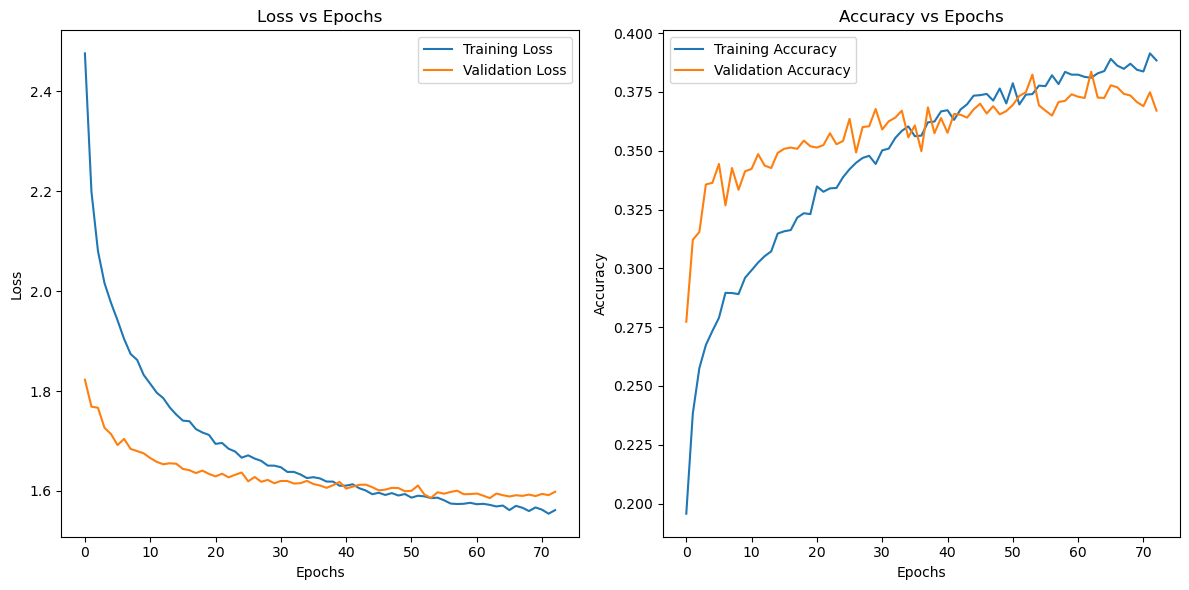

In [15]:
#EXP5#FERresnet

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense, Flatten, BatchNormalization, 
                                     Dropout, Conv2D, MaxPooling2D)
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import os


# Folder path for training images
folder_path = "images/train"  

# Image specifications
picture_size = 48  # Define picture size
batch_size = 128




# Data Generators for training and validation sets
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Automatically split 20% for validation
)

# Training set
train_set = datagen.flow_from_directory(
    "images/train",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    subset='training'  # Use the training subset
)

# Validation set
val_set = datagen.flow_from_directory(
    "images/train",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    subset='validation'  # Use the validation subset
)

# Test set
datagen_test = ImageDataGenerator(rescale=1./255)
test_set = datagen_test.flow_from_directory(
    "images/test",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=False
)

print("Training, validation, and test datasets are ready.")



#model resnet152

from keras.applications.resnet import ResNet152
conv_base = ResNet152(
    weights='imagenet',
    include_top = False,
    input_shape=(48,48,3)
)


# Show the model summary
#base_model.summary()

# Create a Sequential model
model = Sequential()

# Add base model
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
model.add(Dense(7, activation='softmax'))

# Set base model to not trainable
base_model.trainable = False

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
print('CNN model has been created, you can proceed to train your data with this model.')



early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model

history = model.fit(
    train_set,
    epochs=500,
    validation_data=val_set,
    callbacks=[early_stopping]
)


# Evaluate the model on the validation dataset (since you don't have a separate test dataset)

val_loss, val_accuracy = model.evaluate(val_set)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

print('Your model has been trained!')

# Plotting training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
validation_data=val_set

In [16]:
#ferresnt19

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Training, validation, and test datasets are ready.
CNN model has been created, you can proceed to train your data with this model.
Epoch 1/500
180/180 [==============================] - 15s 74ms/step - loss: 2.4610 - accuracy: 0.1984 - val_loss: 1.8664 - val_accuracy: 0.2428
Epoch 2/500
180/180 [==============================] - 13s 74ms/step - loss: 2.2005 - accuracy: 0.2351 - val_loss: 1.7716 - val_accuracy: 0.3083
Epoch 3/500
180/180 [==============================] - 13s 73ms/step - loss: 2.0975 - accuracy: 0.2557 - val_loss: 1.7470 - val_accuracy: 0.3188
Epoch 4/500
180/180 [==============================] - 13s 74ms/step - loss: 2.0209 - accuracy: 0.2641 - val_loss: 1.7407 - val_accuracy: 0.3261
Epoch 5/500
180/180 [==============================] - 13s 74ms/step - loss: 1.9843 - accuracy: 0.2705 - val_loss: 1.7191 - val_accuracy: 0.3365
Epoch 6/500
180/1

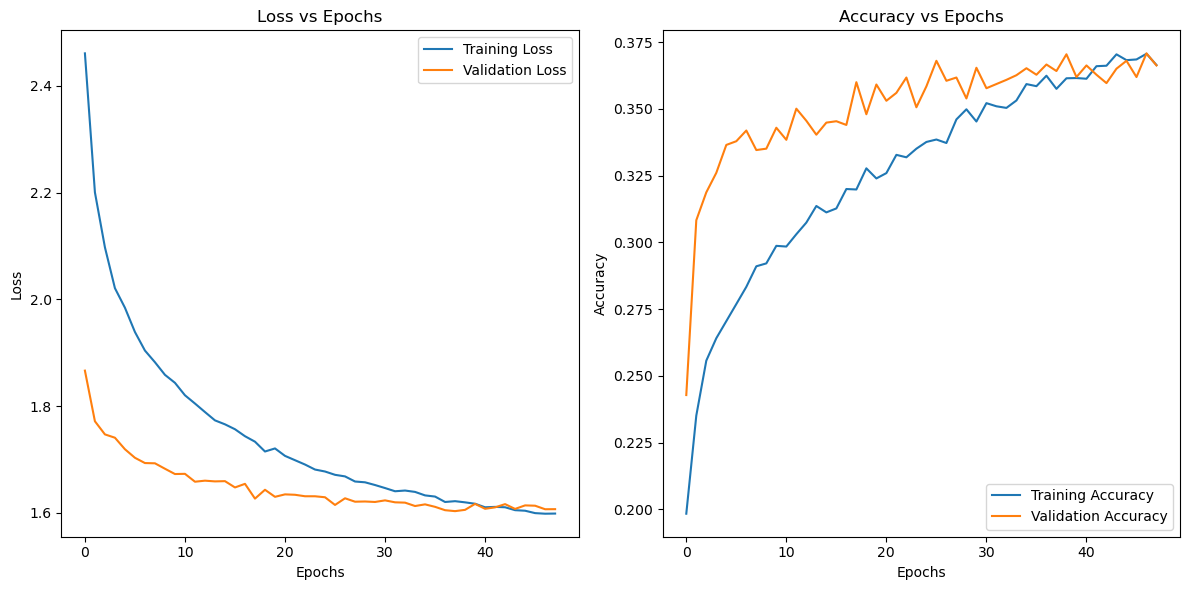

In [17]:
#EXP5#FERresnet

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense, Flatten, BatchNormalization, 
                                     Dropout, Conv2D, MaxPooling2D)
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import os


# Folder path for training images
folder_path = "images/train"  

# Image specifications
picture_size = 48  # Define picture size
batch_size = 128




# Data Generators for training and validation sets
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Automatically split 20% for validation
)

# Training set
train_set = datagen.flow_from_directory(
    "images/train",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    subset='training'  # Use the training subset
)

# Validation set
val_set = datagen.flow_from_directory(
    "images/train",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    subset='validation'  # Use the validation subset
)

# Test set
datagen_test = ImageDataGenerator(rescale=1./255)
test_set = datagen_test.flow_from_directory(
    "images/test",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=False
)

print("Training, validation, and test datasets are ready.")



#model resnet152

from keras.applications.resnet import ResNet152
conv_base = ResNet152(
    weights='imagenet',
    include_top = False,
    input_shape=(48,48,3)
)


# Show the model summary
#base_model.summary()

# Create a Sequential model
model = Sequential()

# Add base model
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
model.add(Dense(7, activation='softmax'))

# Set base model to not trainable
base_model.trainable = False

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
print('CNN model has been created, you can proceed to train your data with this model.')



early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model

history = model.fit(
    train_set,
    epochs=500,
    validation_data=val_set,
    callbacks=[early_stopping]
)


# Evaluate the model on the validation dataset (since you don't have a separate test dataset)

val_loss, val_accuracy = model.evaluate(val_set)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

print('Your model has been trained!')

# Plotting training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
validation_data=val_set

In [18]:
#fervgg196

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Training, validation, and test datasets are ready.
CNN model has been created, you can proceed to train your data with this model.
Epoch 1/500
180/180 [==============================] - 15s 75ms/step - loss: 2.4523 - accuracy: 0.1946 - val_loss: 1.8765 - val_accuracy: 0.2663
Epoch 2/500
180/180 [==============================] - 13s 73ms/step - loss: 2.2023 - accuracy: 0.2348 - val_loss: 1.8050 - val_accuracy: 0.3026
Epoch 3/500
180/180 [==============================] - 13s 74ms/step - loss: 2.0885 - accuracy: 0.2531 - val_loss: 1.7715 - val_accuracy: 0.3182
Epoch 4/500
180/180 [==============================] - 13s 74ms/step - loss: 2.0272 - accuracy: 0.2625 - val_loss: 1.7537 - val_accuracy: 0.3123
Epoch 5/500
180/180 [==============================] - 13s 73ms/step - loss: 1.9732 - accuracy: 0.2740 - val_loss: 1.7319 - val_accuracy: 0.3233
Epoch 6/500
180/1

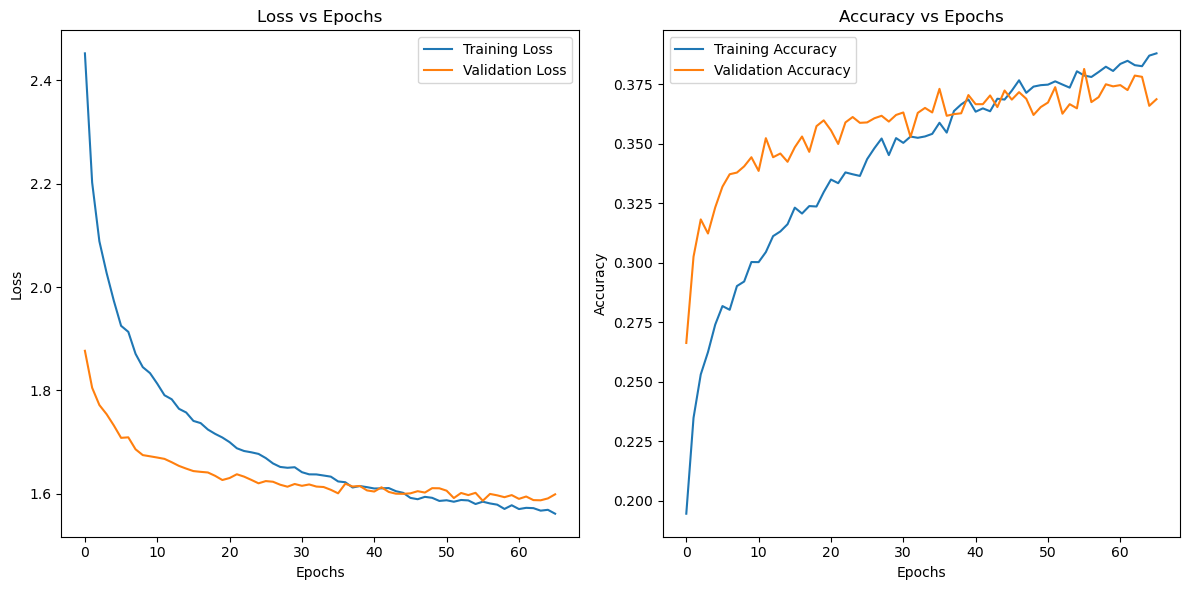

In [19]:
#EXP2#FERVGG19

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense, Flatten, BatchNormalization, 
                                     Dropout, Conv2D, MaxPooling2D)
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import os


# Folder path for training images
folder_path = "images/train"  

# Image specifications
picture_size = 48  # Define picture size
batch_size = 128




# Data Generators for training and validation sets
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Automatically split 20% for validation
)

# Training set
train_set = datagen.flow_from_directory(
    "images/train",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    subset='training'  # Use the training subset
)

# Validation set
val_set = datagen.flow_from_directory(
    "images/train",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    subset='validation'  # Use the validation subset
)

# Test set
datagen_test = ImageDataGenerator(rescale=1./255)
test_set = datagen_test.flow_from_directory(
    "images/test",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=False
)

print("Training, validation, and test datasets are ready.")



# Load the pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Show the model summary
#base_model.summary()

# Create a Sequential model
model = Sequential()

# Add base model
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
model.add(Dense(7, activation='softmax'))

# Set base model to not trainable
base_model.trainable = False

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
print('CNN model has been created, you can proceed to train your data with this model.')



early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model

history = model.fit(
    train_set,
    epochs=500,
    validation_data=val_set,
    callbacks=[early_stopping]
)


# Evaluate the model on the validation dataset (since you don't have a separate test dataset)

val_loss, val_accuracy = model.evaluate(val_set)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

print('Your model has been trained!')

# Plotting training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [1]:
#fervgg7

2024-12-03 08:54:30.953022: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-03 08:54:31.299507: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-03 08:54:32.079235: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Training, validation, and test datasets are ready.


2024-12-03 08:54:33.791133: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-03 08:54:33.966609: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-03 08:54:33.966755: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

CNN model has been created, you can proceed to train your data with this model.
Epoch 1/500


2024-12-03 08:54:37.153406: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8905
2024-12-03 08:54:37.895651: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-12-03 08:54:37.915655: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x785a8af2df20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-12-03 08:54:37.915675: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Laptop GPU, Compute Capability 8.6
2024-12-03 08:54:37.931149: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-12-03 08:54:38.073612: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifeti

180/180 [==============================] - 37s 185ms/step - loss: 2.4334 - accuracy: 0.2031 - val_loss: 1.7991 - val_accuracy: 0.2932
Epoch 2/500
180/180 [==============================] - 21s 116ms/step - loss: 2.1834 - accuracy: 0.2396 - val_loss: 1.7669 - val_accuracy: 0.3153
Epoch 3/500
180/180 [==============================] - 23s 128ms/step - loss: 2.0829 - accuracy: 0.2529 - val_loss: 1.7492 - val_accuracy: 0.3189
Epoch 4/500
180/180 [==============================] - 21s 116ms/step - loss: 2.0147 - accuracy: 0.2658 - val_loss: 1.7373 - val_accuracy: 0.3280
Epoch 5/500
180/180 [==============================] - 18s 102ms/step - loss: 1.9607 - accuracy: 0.2742 - val_loss: 1.7142 - val_accuracy: 0.3313
Epoch 6/500
180/180 [==============================] - 19s 107ms/step - loss: 1.9310 - accuracy: 0.2770 - val_loss: 1.7063 - val_accuracy: 0.3336
Epoch 7/500
180/180 [==============================] - 22s 122ms/step - loss: 1.8978 - accuracy: 0.2826 - val_loss: 1.6962 - val_accurac

180/180 [==============================] - 22s 120ms/step - loss: 1.5768 - accuracy: 0.3799 - val_loss: 1.5913 - val_accuracy: 0.3771
Epoch 58/500
180/180 [==============================] - 14s 76ms/step - loss: 1.5819 - accuracy: 0.3742 - val_loss: 1.5966 - val_accuracy: 0.3700
Epoch 59/500
180/180 [==============================] - 14s 77ms/step - loss: 1.5749 - accuracy: 0.3792 - val_loss: 1.5981 - val_accuracy: 0.3743
Epoch 60/500
180/180 [==============================] - 14s 78ms/step - loss: 1.5738 - accuracy: 0.3761 - val_loss: 1.5982 - val_accuracy: 0.3627
Epoch 61/500
180/180 [==============================] - 14s 78ms/step - loss: 1.5756 - accuracy: 0.3809 - val_loss: 1.5937 - val_accuracy: 0.3736
Epoch 62/500
180/180 [==============================] - 14s 78ms/step - loss: 1.5763 - accuracy: 0.3820 - val_loss: 1.5921 - val_accuracy: 0.3755
Epoch 63/500
180/180 [==============================] - 13s 75ms/step - loss: 1.5702 - accuracy: 0.3815 - val_loss: 1.5906 - val_accurac

180/180 [==============================] - 13s 73ms/step - loss: 1.5284 - accuracy: 0.4042 - val_loss: 1.5792 - val_accuracy: 0.3745
Epoch 114/500
180/180 [==============================] - 13s 73ms/step - loss: 1.5201 - accuracy: 0.4070 - val_loss: 1.5808 - val_accuracy: 0.3837
Epoch 115/500
180/180 [==============================] - 13s 73ms/step - loss: 1.5222 - accuracy: 0.4059 - val_loss: 1.5783 - val_accuracy: 0.3843
Epoch 116/500
180/180 [==============================] - 13s 74ms/step - loss: 1.5236 - accuracy: 0.4048 - val_loss: 1.5656 - val_accuracy: 0.3970
Epoch 117/500
180/180 [==============================] - 13s 72ms/step - loss: 1.5215 - accuracy: 0.4066 - val_loss: 1.5696 - val_accuracy: 0.3820
Epoch 118/500
180/180 [==============================] - 13s 73ms/step - loss: 1.5208 - accuracy: 0.4057 - val_loss: 1.5704 - val_accuracy: 0.3843
Epoch 119/500
180/180 [==============================] - 13s 73ms/step - loss: 1.5203 - accuracy: 0.4056 - val_loss: 1.5727 - val_ac

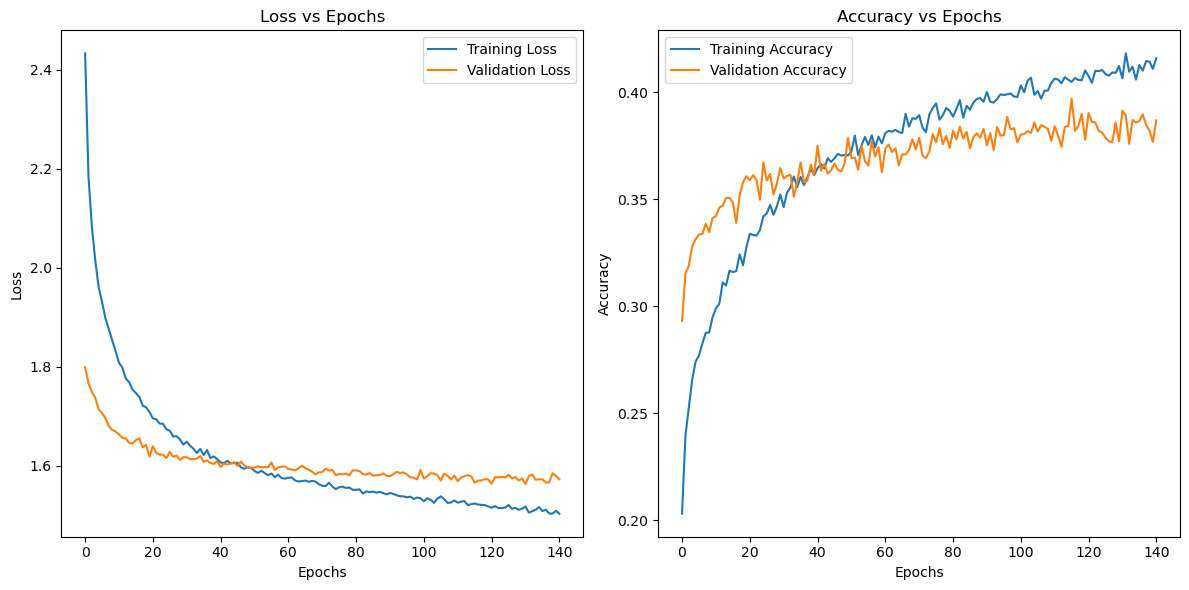

In [2]:
#EXP2#FERVGG19

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense, Flatten, BatchNormalization, 
                                     Dropout, Conv2D, MaxPooling2D)
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import os


# Folder path for training images
folder_path = "images/train"  

# Image specifications
picture_size = 48  # Define picture size
batch_size = 128




# Data Generators for training and validation sets
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Automatically split 20% for validation
)

# Training set
train_set = datagen.flow_from_directory(
    "images/train",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    subset='training'  # Use the training subset
)

# Validation set
val_set = datagen.flow_from_directory(
    "images/train",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    subset='validation'  # Use the validation subset
)

# Test set
datagen_test = ImageDataGenerator(rescale=1./255)
test_set = datagen_test.flow_from_directory(
    "images/test",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=False
)

print("Training, validation, and test datasets are ready.")



# Load the pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Show the model summary
#base_model.summary()

# Create a Sequential model
model = Sequential()

# Add base model
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
model.add(Dense(7, activation='softmax'))

# Set base model to not trainable
base_model.trainable = False

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
print('CNN model has been created, you can proceed to train your data with this model.')



early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model

history = model.fit(
    train_set,
    epochs=500,
    validation_data=val_set,
    callbacks=[early_stopping]
)


# Evaluate the model on the validation dataset (since you don't have a separate test dataset)

val_loss, val_accuracy = model.evaluate(val_set)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

print('Your model has been trained!')

# Plotting training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [3]:
#fervgg8

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Training, validation, and test datasets are ready.
CNN model has been created, you can proceed to train your data with this model.
Epoch 1/500
180/180 [==============================] - 15s 74ms/step - loss: 2.4673 - accuracy: 0.1947 - val_loss: 1.8266 - val_accuracy: 0.2522
Epoch 2/500
180/180 [==============================] - 13s 74ms/step - loss: 2.2005 - accuracy: 0.2338 - val_loss: 1.7758 - val_accuracy: 0.2933
Epoch 3/500
180/180 [==============================] - 13s 74ms/step - loss: 2.1005 - accuracy: 0.2527 - val_loss: 1.7642 - val_accuracy: 0.3055
Epoch 4/500
180/180 [==============================] - 13s 74ms/step - loss: 2.0408 - accuracy: 0.2638 - val_loss: 1.7525 - val_accuracy: 0.3179
Epoch 5/500
180/180 [==============================] - 13s 73ms/step - loss: 1.9769 - accuracy: 0.2728 - val_loss: 1.7325 - val_accuracy: 0.3261
Epoch 6/500
180/1

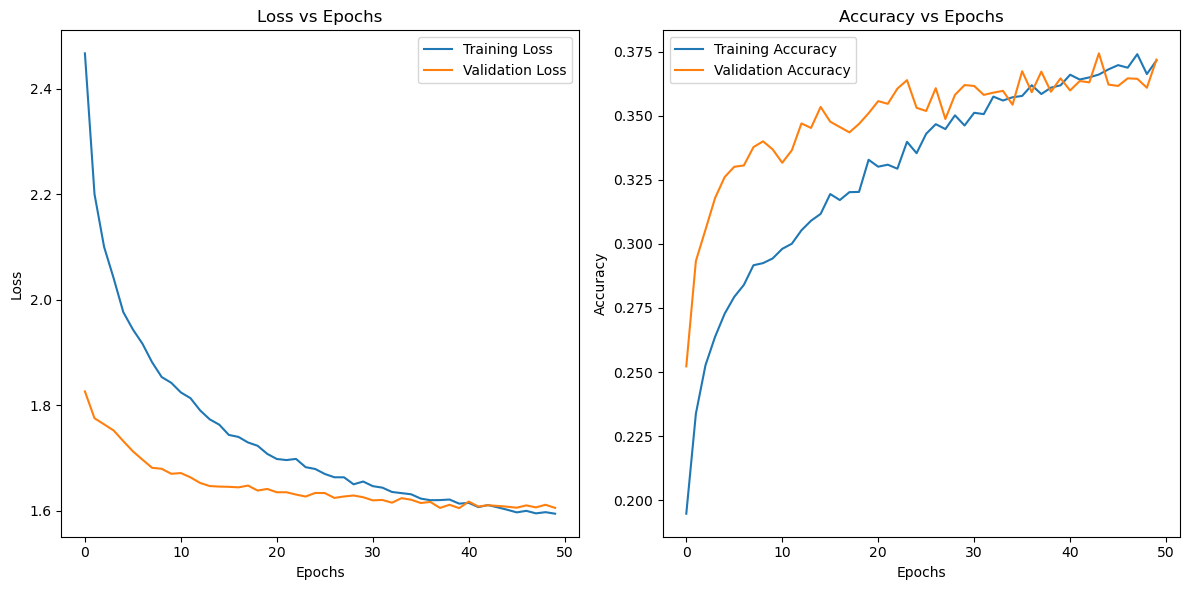

In [4]:
#EXP2#FERVGG19

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense, Flatten, BatchNormalization, 
                                     Dropout, Conv2D, MaxPooling2D)
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import os


# Folder path for training images
folder_path = "images/train"  

# Image specifications
picture_size = 48  # Define picture size
batch_size = 128




# Data Generators for training and validation sets
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Automatically split 20% for validation
)

# Training set
train_set = datagen.flow_from_directory(
    "images/train",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    subset='training'  # Use the training subset
)

# Validation set
val_set = datagen.flow_from_directory(
    "images/train",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    subset='validation'  # Use the validation subset
)

# Test set
datagen_test = ImageDataGenerator(rescale=1./255)
test_set = datagen_test.flow_from_directory(
    "images/test",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=False
)

print("Training, validation, and test datasets are ready.")



# Load the pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Show the model summary
#base_model.summary()

# Create a Sequential model
model = Sequential()

# Add base model
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
model.add(Dense(7, activation='softmax'))

# Set base model to not trainable
base_model.trainable = False

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
print('CNN model has been created, you can proceed to train your data with this model.')



early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model

history = model.fit(
    train_set,
    epochs=500,
    validation_data=val_set,
    callbacks=[early_stopping]
)


# Evaluate the model on the validation dataset (since you don't have a separate test dataset)

val_loss, val_accuracy = model.evaluate(val_set)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

print('Your model has been trained!')

# Plotting training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Training, validation, and test datasets are ready.
CNN model has been created, you can proceed to train your data with this model.
Epoch 1/500
180/180 [==============================] - 15s 75ms/step - loss: 2.4420 - accuracy: 0.1990 - val_loss: 1.8301 - val_accuracy: 0.2909
Epoch 2/500
180/180 [==============================] - 13s 74ms/step - loss: 2.2136 - accuracy: 0.2369 - val_loss: 1.7740 - val_accuracy: 0.3170
Epoch 3/500
180/180 [==============================] - 13s 73ms/step - loss: 2.0896 - accuracy: 0.2541 - val_loss: 1.7454 - val_accuracy: 0.3242
Epoch 4/500
180/180 [==============================] - 13s 74ms/step - loss: 2.0213 - accuracy: 0.2686 - val_loss: 1.7359 - val_accuracy: 0.3245
Epoch 5/500
180/180 [==============================] - 13s 74ms/step - loss: 1.9850 - accuracy: 0.2701 - val_loss: 1.7293 - val_accuracy: 0.3233
Epoch 6/500
180/1

180/180 [==============================] - 13s 74ms/step - loss: 1.5861 - accuracy: 0.3781 - val_loss: 1.5897 - val_accuracy: 0.3731
Epoch 56/500
180/180 [==============================] - 13s 74ms/step - loss: 1.5848 - accuracy: 0.3786 - val_loss: 1.5957 - val_accuracy: 0.3705
Epoch 57/500
180/180 [==============================] - 13s 73ms/step - loss: 1.5830 - accuracy: 0.3781 - val_loss: 1.5942 - val_accuracy: 0.3721
Epoch 58/500
180/180 [==============================] - 13s 74ms/step - loss: 1.5804 - accuracy: 0.3786 - val_loss: 1.5933 - val_accuracy: 0.3731
Epoch 59/500
180/180 [==============================] - 13s 73ms/step - loss: 1.5743 - accuracy: 0.3801 - val_loss: 1.5876 - val_accuracy: 0.3721
Epoch 60/500
180/180 [==============================] - 13s 73ms/step - loss: 1.5731 - accuracy: 0.3864 - val_loss: 1.5991 - val_accuracy: 0.3681
Epoch 61/500
180/180 [==============================] - 13s 74ms/step - loss: 1.5728 - accuracy: 0.3792 - val_loss: 1.5942 - val_accuracy

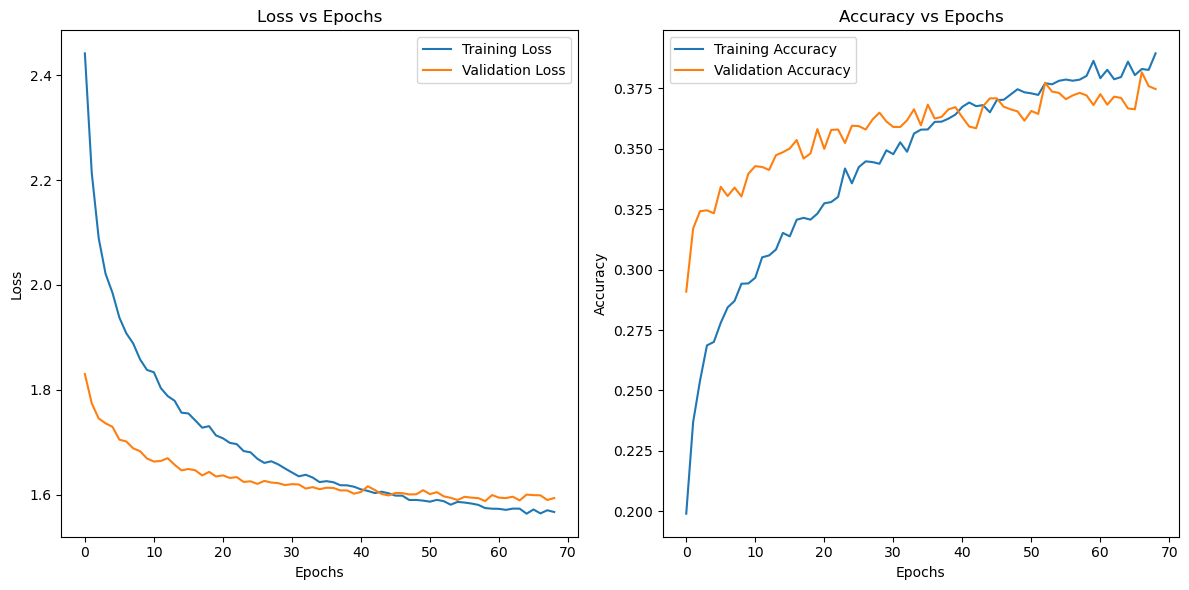

In [6]:
#EXP2#FERVGG19

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense, Flatten, BatchNormalization, 
                                     Dropout, Conv2D, MaxPooling2D)
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import os


# Folder path for training images
folder_path = "images/train"  

# Image specifications
picture_size = 48  # Define picture size
batch_size = 128




# Data Generators for training and validation sets
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Automatically split 20% for validation
)

# Training set
train_set = datagen.flow_from_directory(
    "images/train",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    subset='training'  # Use the training subset
)

# Validation set
val_set = datagen.flow_from_directory(
    "images/train",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    subset='validation'  # Use the validation subset
)

# Test set
datagen_test = ImageDataGenerator(rescale=1./255)
test_set = datagen_test.flow_from_directory(
    "images/test",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=False
)

print("Training, validation, and test datasets are ready.")



# Load the pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Show the model summary
#base_model.summary()

# Create a Sequential model
model = Sequential()

# Add base model
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
model.add(Dense(7, activation='softmax'))

# Set base model to not trainable
base_model.trainable = False

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
print('CNN model has been created, you can proceed to train your data with this model.')



early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model

history = model.fit(
    train_set,
    epochs=500,
    validation_data=val_set,
    callbacks=[early_stopping]
)


# Evaluate the model on the validation dataset (since you don't have a separate test dataset)

val_loss, val_accuracy = model.evaluate(val_set)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

print('Your model has been trained!')

# Plotting training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [7]:
#fervgg10

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Training, validation, and test datasets are ready.
CNN model has been created, you can proceed to train your data with this model.
Epoch 1/500
180/180 [==============================] - 15s 75ms/step - loss: 2.4451 - accuracy: 0.2035 - val_loss: 1.8146 - val_accuracy: 0.2935
Epoch 2/500
180/180 [==============================] - 13s 74ms/step - loss: 2.1873 - accuracy: 0.2386 - val_loss: 1.7737 - val_accuracy: 0.3073
Epoch 3/500
180/180 [==============================] - 13s 74ms/step - loss: 2.0825 - accuracy: 0.2616 - val_loss: 1.7604 - val_accuracy: 0.3107
Epoch 4/500
180/180 [==============================] - 13s 74ms/step - loss: 2.0259 - accuracy: 0.2670 - val_loss: 1.7433 - val_accuracy: 0.3207
Epoch 5/500
180/180 [==============================] - 13s 74ms/step - loss: 1.9721 - accuracy: 0.2723 - val_loss: 1.7259 - val_accuracy: 0.3303
Epoch 6/500
180/1

180/180 [==============================] - 13s 74ms/step - loss: 1.5837 - accuracy: 0.3774 - val_loss: 1.6029 - val_accuracy: 0.3688
Epoch 56/500
180/180 [==============================] - 13s 75ms/step - loss: 1.5802 - accuracy: 0.3794 - val_loss: 1.5935 - val_accuracy: 0.3778
Epoch 57/500
180/180 [==============================] - 13s 74ms/step - loss: 1.5871 - accuracy: 0.3753 - val_loss: 1.6028 - val_accuracy: 0.3693
Epoch 58/500
180/180 [==============================] - 13s 74ms/step - loss: 1.5779 - accuracy: 0.3814 - val_loss: 1.6034 - val_accuracy: 0.3701
Epoch 59/500
180/180 [==============================] - 13s 74ms/step - loss: 1.5847 - accuracy: 0.3752 - val_loss: 1.6042 - val_accuracy: 0.3726
Epoch 60/500
180/180 [==============================] - 13s 74ms/step - loss: 1.5834 - accuracy: 0.3795 - val_loss: 1.6033 - val_accuracy: 0.3731
Epoch 61/500
180/180 [==============================] - 13s 73ms/step - loss: 1.5734 - accuracy: 0.3838 - val_loss: 1.6024 - val_accuracy

180/180 [==============================] - 13s 74ms/step - loss: 1.5283 - accuracy: 0.4062 - val_loss: 1.5799 - val_accuracy: 0.3815
Epoch 112/500
180/180 [==============================] - 13s 74ms/step - loss: 1.5295 - accuracy: 0.4002 - val_loss: 1.5813 - val_accuracy: 0.3808
Epoch 113/500
180/180 [==============================] - 13s 74ms/step - loss: 1.5329 - accuracy: 0.3992 - val_loss: 1.5804 - val_accuracy: 0.3818
Epoch 114/500
180/180 [==============================] - 13s 74ms/step - loss: 1.5226 - accuracy: 0.4037 - val_loss: 1.5912 - val_accuracy: 0.3752
Epoch 115/500
180/180 [==============================] - 13s 74ms/step - loss: 1.5276 - accuracy: 0.4056 - val_loss: 1.5758 - val_accuracy: 0.3839
Epoch 116/500
45/45 [==============================] - 3s 60ms/step - loss: 1.5801 - accuracy: 0.3782
Validation Loss: 1.5801494121551514
Validation Accuracy: 0.3781571090221405
Your model has been trained!


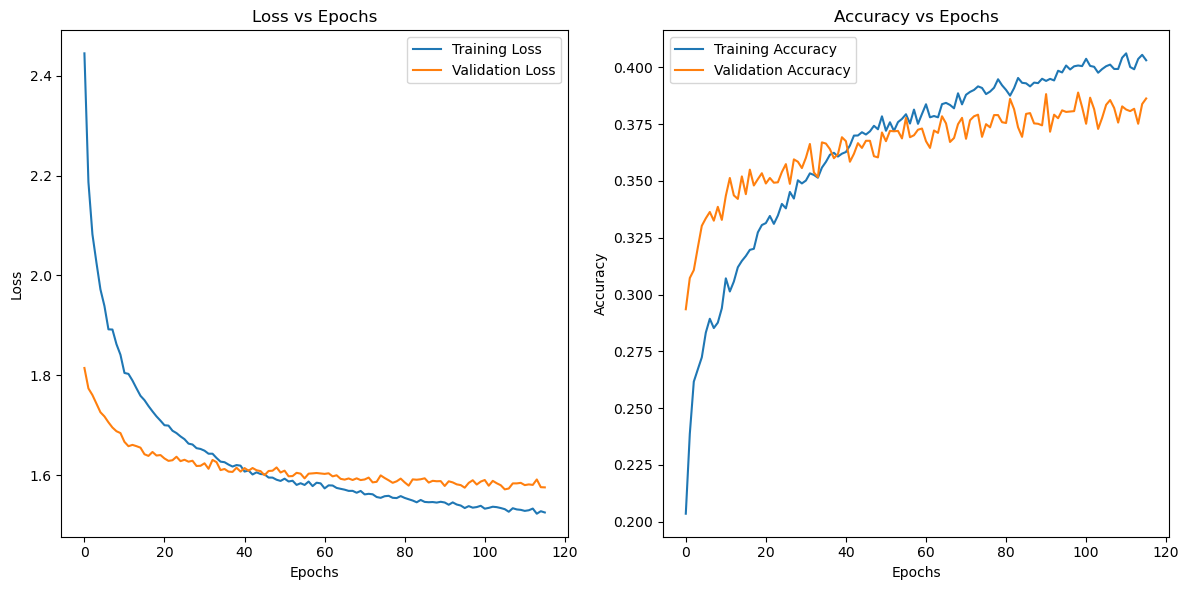

In [8]:
#EXP2#FERVGG19

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense, Flatten, BatchNormalization, 
                                     Dropout, Conv2D, MaxPooling2D)
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import os


# Folder path for training images
folder_path = "images/train"  

# Image specifications
picture_size = 48  # Define picture size
batch_size = 128




# Data Generators for training and validation sets
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Automatically split 20% for validation
)

# Training set
train_set = datagen.flow_from_directory(
    "images/train",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    subset='training'  # Use the training subset
)

# Validation set
val_set = datagen.flow_from_directory(
    "images/train",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    subset='validation'  # Use the validation subset
)

# Test set
datagen_test = ImageDataGenerator(rescale=1./255)
test_set = datagen_test.flow_from_directory(
    "images/test",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode='categorical',
    shuffle=False
)

print("Training, validation, and test datasets are ready.")



# Load the pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Show the model summary
#base_model.summary()

# Create a Sequential model
model = Sequential()

# Add base model
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
model.add(Dense(7, activation='softmax'))

# Set base model to not trainable
base_model.trainable = False

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
print('CNN model has been created, you can proceed to train your data with this model.')



early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model

history = model.fit(
    train_set,
    epochs=500,
    validation_data=val_set,
    callbacks=[early_stopping]
)


# Evaluate the model on the validation dataset (since you don't have a separate test dataset)

val_loss, val_accuracy = model.evaluate(val_set)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

print('Your model has been trained!')

# Plotting training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
